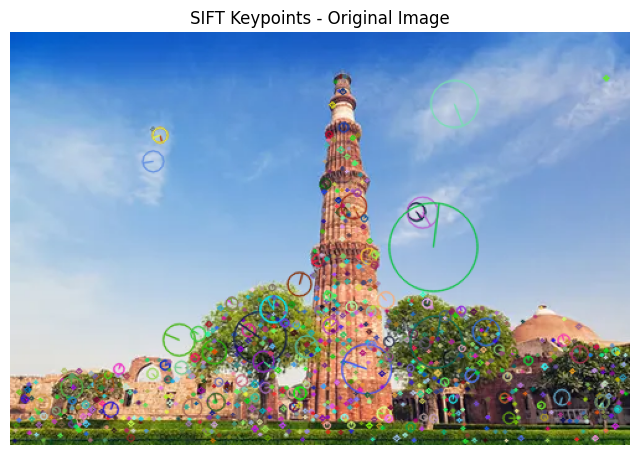

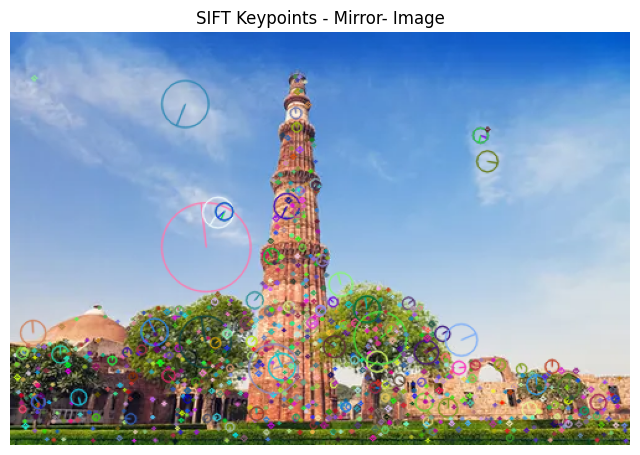

Keypoints in Original: 996
Keypoints in Flipped: 1001
Good Matches Found: 63


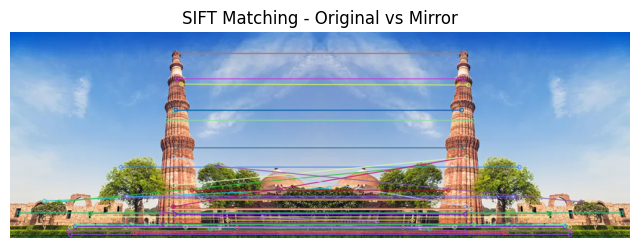

In [ ]:
import cv2
import matplotlib.pyplot as plt

def show_image(img, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def sift_match_with_mirror_image(image_path):
    # Load original image
    img_original = cv2.imread("/content/fm1.webp")

    # Create horizontally flipped (mirror) image
    img_flipped = cv2.flip(img_original, 1)

    # Convert both to grayscale for SIFT
    gray_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
    gray_flipped = cv2.cvtColor(img_flipped, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT
    sift = cv2.SIFT_create()

    # Detect keypoints and descriptors
    kp1, des1 = sift.detectAndCompute(gray_original, None)
    kp2, des2 = sift.detectAndCompute(gray_flipped, None)

    # Draw keypoints
    img_kp1 = cv2.drawKeypoints(img_original, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img_kp2 = cv2.drawKeypoints(img_flipped, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    show_image(img_kp1, "SIFT Keypoints - Original Image")
    show_image(img_kp2, "SIFT Keypoints - Mirror- Image")

    # Match features using BFMatcher + Lowe’s ratio test
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

    print(f"Keypoints in Original: {len(kp1)}")
    print(f"Keypoints in Flipped: {len(kp2)}")
    print(f"Good Matches Found: {len(good_matches)}")

    # Draw top good matches
    matched_img = cv2.drawMatches(img_original, kp1, img_flipped, kp2, good_matches[:50], None, flags=2)
    show_image(matched_img, "SIFT Matching - Original vs Mirror")

# ✅ Replace with your image path
sift_match_with_mirror_image('taj.jpg')


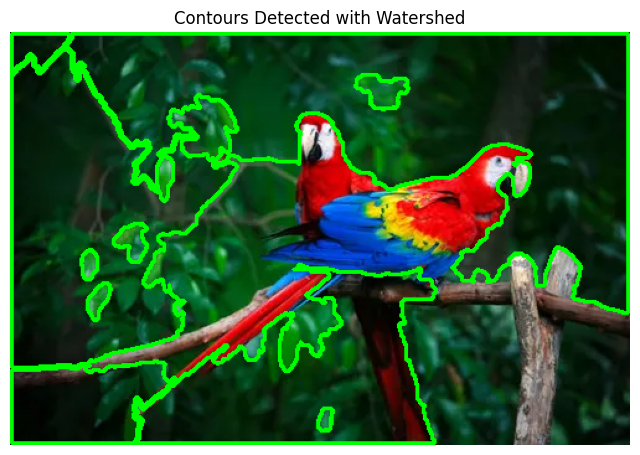

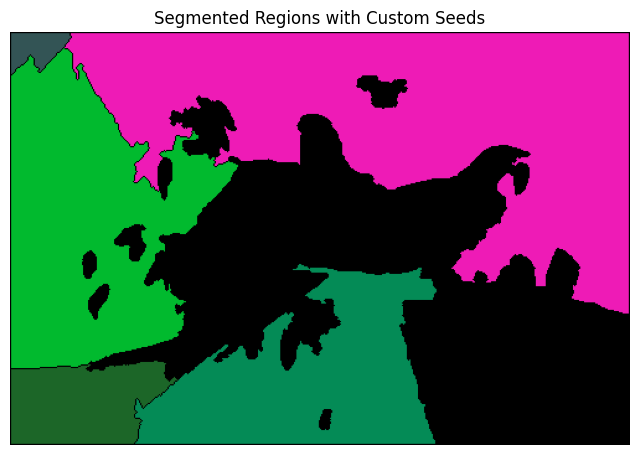

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(img, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def contour_detection_watershed(image_path):
    # Step 1: Read image
    img = cv2.imread("/content/scarlet-macaws.webp")
    original = img.copy()

    # Step 2: Preprocessing
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Step 3: Noise removal with morphological operations
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Step 4: Sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Step 5: Sure foreground area using distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Step 6: Unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Step 7: Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add 1 to all labels so that sure background is not 0
    markers = markers + 1

    # Mark the unknown region with 0
    markers[unknown == 255] = 0

    # Step 8: Apply Watershed
    markers = cv2.watershed(img, markers)
    img[markers == -1] = [0, 0, 255]  # Boundary in red

    result = np.zeros_like(img)
    for marker in range(2, np.max(markers) + 1):
        mask = np.uint8(markers == marker)
        color = np.random.randint(0, 255, size=3).tolist()
        result[mask == 1] = color

    # Overlay contours on original
    contours, _ = cv2.findContours(np.uint8(markers > 1), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(original, contours, -1, (0, 255, 0), 2)

    # Show results
    show_image(original, "Contours Detected with Watershed")
    show_image(result, "Segmented Regions with Custom Seeds")




In [ ]:
!pip install torch torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet expects 224x224 input
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load dataset
trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                         download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


100%|██████████| 169M/169M [00:03<00:00, 52.5MB/s]


In [ ]:
import torchvision.models as models
import torch.nn as nn

def get_model(model_type):
    if model_type == "resnet18":
        model = models.resnet18(pretrained=True)
    else:
        model = models.resnet34(pretrained=True)

    # Modify the last layer for CIFAR-100
    model.fc = nn.Linear(model.fc.in_features, 100)
    return model


In [ ]:
import torch.optim as optim
import time

def train_model(model, trainloader, testloader, epochs=5):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses, test_losses = [], []
    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(trainloader))
        acc, test_loss = evaluate(model, testloader)
        test_losses.append(test_loss)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}, Test Accuracy: {acc:.2f}%")

    total_time = time.time() - start_time
    return train_losses, test_losses, total_time

def evaluate(model, testloader):
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    correct, total, test_loss = 0, 0, 0.0
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    return accuracy, test_loss / len(testloader)


In [ ]:
# Train ResNet-18
model18 = get_model("resnet18")
loss18_train, loss18_test, time18 = train_model(model18, trainloader, testloader)

# Train ResNet-34
model34 = get_model("resnet34")
loss34_train, loss34_test, time34 = train_model(model34, trainloader, testloader)

# Print inference times
print(f"\nResNet-18 Inference Time: {time18:.2f} seconds")
print(f"ResNet-34 Inference Time: {time34:.2f} seconds")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 198MB/s]


Epoch 1/5, Loss: 1543.7833, Test Accuracy: 52.82%
Epoch 2/5, Loss: 927.8188, Test Accuracy: 61.57%
Epoch 3/5, Loss: 656.3244, Test Accuracy: 66.01%
Epoch 4/5, Loss: 449.8226, Test Accuracy: 65.14%
Epoch 5/5, Loss: 304.6247, Test Accuracy: 65.53%


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 205MB/s]


Epoch 1/5, Loss: 1784.1534, Test Accuracy: 50.59%
